# Importing libraries

In [ ]:
! pip install medmnist keras_tuner -q

     |████████████████████████████████| 135 kB 6.8 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 
     |████████████████████████████████| 1.6 MB 50.9 MB/s 


In [ ]:
from sklearn.model_selection import KFold

import tensorflow as tf
import keras_tuner as kt

import medmnist
from medmnist import INFO
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount('/content/gdrive')

# Defining constants

In [ ]:
NUMFEATURES = 28 * 28 * 3 # = 2352
NUMCLASSES = 8

# Importing BloodMNIST

In [ ]:
info = INFO['bloodmnist']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

data_transform = transforms.Compose([
    transforms.ToTensor()
])

# raw data
train_dataset = DataClass(
    split='train', transform=data_transform, download=True)
val_dataset = DataClass(
    split='val', transform=data_transform, download=True)

  0%|          | 0/35461855 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


# Preprocessing data

In [ ]:
# converting images into arrays and normalizing
x_train = train_dataset.imgs / 255
y_train = train_dataset.labels

x_val = val_dataset.imgs / 255
y_val = val_dataset.labels

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(11959, 28, 28, 3)
(11959, 1)
(1712, 28, 28, 3)
(1712, 1)


# Building the network

In [ ]:
def build_model(filters, kernel_size):

    # optimizer
    adam = tf.keras.optimizers.Adam()

    # leaky relu
    leakyrelu = tf.keras.layers.LeakyReLU()

    # creating the model
    model = tf.keras.models.Sequential()

    # convolutional layer
    model.add(tf.keras.layers.Conv2D(
              input_shape=(28, 28, 3),
              filters=filters,
              kernel_size=kernel_size,
              padding='same',
              activation=leakyrelu))

    # pooling layer
    model.add(tf.keras.layers.MaxPooling2D(
              pool_size=2, 
              strides=2, 
              padding='same'))
    
    # flattening layer
    model.add(tf.keras.layers.Flatten())
    
    # output layer
    model.add(tf.keras.layers.Dense(NUMCLASSES, 
                                    activation='softmax'))

    model.compile(optimizer=adam,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    
    return model

#Plotting graphs

In [ ]:
# obtaining the test dataset
test_dataset = DataClass(
    split='test', transform=data_transform, download=True)

x_test = test_dataset.imgs / 255
y_test = test_dataset.labels

print(x_test.shape)
print(y_test.shape)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
(3421, 28, 28, 3)
(3421, 1)


In [ ]:
# obtaining numkernels performance data

# plotting the numkernels graph
accs = []
numkernels = range(1, 21)

for kernels in numkernels:
  model = build_model(kernels, kernel_size=5)

  #stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  model.fit(x_train, y_train, batch_size=32, epochs=30)

  acc = model.evaluate(x_val, y_val)[1]
  print(f'Model with {kernels} kernels: accuracy of {acc}\n')
  accs.append(acc)

Epoch 1/30
374/374 [==============================] - 2s 3ms/step - loss: 1.5120 - accuracy: 0.4293
Epoch 2/30
374/374 [==============================] - 1s 3ms/step - loss: 1.1282 - accuracy: 0.5754
Epoch 3/30
374/374 [==============================] - 1s 3ms/step - loss: 1.0211 - accuracy: 0.6312
Epoch 4/30
374/374 [==============================] - 1s 3ms/step - loss: 0.9624 - accuracy: 0.6552
Epoch 5/30
374/374 [==============================] - 1s 3ms/step - loss: 0.9254 - accuracy: 0.6707
Epoch 6/30
374/374 [==============================] - 1s 3ms/step - loss: 0.9014 - accuracy: 0.6795
Epoch 7/30
374/374 [==============================] - 1s 3ms/step - loss: 0.8877 - accuracy: 0.6837
Epoch 8/30
374/374 [==============================] - 1s 3ms/step - loss: 0.8744 - accuracy: 0.6909
Epoch 9/30
374/374 [==============================] - 1s 3ms/step - loss: 0.8637 - accuracy: 0.6942
Epoch 10/30
374/374 [==============================] - 1s 3ms/step - loss: 0.8581 - accuracy: 0.6982

[0.7178738117218018, 0.802570104598999, 0.8574766516685486, 0.8779205679893494, 0.8744158744812012, 0.8703271150588989, 0.8901869058609009, 0.8843457698822021, 0.8942757248878479, 0.8931074738502502, 0.8983644843101501, 0.8925233483314514, 0.9012850522994995, 0.8919392228126526, 0.8954439163208008, 0.9018691778182983, 0.9123831987380981, 0.9082943797111511, 0.9012850522994995, 0.9065420627593994]
range(1, 21)


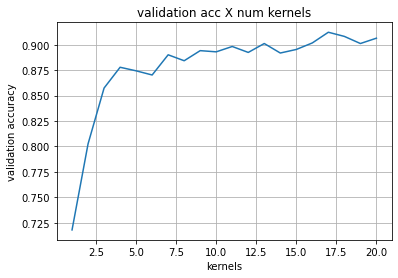

In [ ]:
#Plotting numkernels x accuracy
print(accs)
print(numkernels)

plt.plot(numkernels, accs)
plt.title("validation acc X num kernels")
plt.xlabel("kernels")
plt.ylabel("validation accuracy")
plt.grid(True)
plt.show()

In [ ]:
# obtaining kernel size performance data

# plotting the numkernels graph
accs2 = []
kernelsizes = [1, 3, 5, 7, 9, 11]

for kernelsize in kernelsizes:
  model = build_model(16, kernel_size=kernelsize)

  #stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  model.fit(x_train, y_train, batch_size=32, epochs=30)

  acc = model.evaluate(x_val, y_val)[1]
  print(f'Model with kernels of size {kernelsize} : accuracy of {acc}\n')
  accs2.append(acc)

Epoch 1/30
374/374 [==============================] - 3s 6ms/step - loss: 1.1931 - accuracy: 0.5917
Epoch 2/30
374/374 [==============================] - 1s 4ms/step - loss: 0.8032 - accuracy: 0.7414
Epoch 3/30
374/374 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.7730
Epoch 4/30
374/374 [==============================] - 1s 3ms/step - loss: 0.6280 - accuracy: 0.7981
Epoch 5/30
374/374 [==============================] - 1s 3ms/step - loss: 0.5810 - accuracy: 0.8097
Epoch 6/30
374/374 [==============================] - 1s 3ms/step - loss: 0.5413 - accuracy: 0.8218
Epoch 7/30
374/374 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.8321
Epoch 8/30
374/374 [==============================] - 1s 3ms/step - loss: 0.4790 - accuracy: 0.8466
Epoch 9/30
374/374 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.8508
Epoch 10/30
374/374 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8567

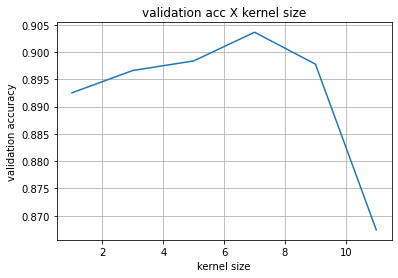

In [ ]:
#Plotting numkernels x accuracy
#print(accs2)
#print(kernelsizes)

plt.plot([1, 3, 5, 7, 9, 11], [0.8925233483314514, 0.8966121673583984, 0.8983644843101501, 0.90362149477005, 0.8977803587913513, 0.8674065470695496])
plt.title("validation acc X kernel size")
plt.xlabel("kernel size")
plt.ylabel("validation accuracy")
plt.grid(True)
plt.show()

# Testing the model

In [ ]:
# building the best model
best_model = build_model(16, 7)

# Fit with the entire dataset.
x_all = np.concatenate((x_train, x_val))
y_all = np.concatenate((y_train, y_val))

best_model.fit(x_all, y_all, batch_size=32, epochs=30)
best_model.save('')

Epoch 1/30
428/428 [==============================] - 12s 3ms/step - loss: 1.0531 - accuracy: 0.6269
Epoch 2/30
428/428 [==============================] - 1s 3ms/step - loss: 0.6612 - accuracy: 0.7756
Epoch 3/30
428/428 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.8196
Epoch 4/30
428/428 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8446
Epoch 5/30
428/428 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8570
Epoch 6/30
428/428 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8683
Epoch 7/30
428/428 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8713
Epoch 8/30
428/428 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8780
Epoch 9/30
428/428 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8838
Epoch 10/30
428/428 [==============================] - 2s 4ms/step - loss: 0.3184 - accuracy: 0.889

In [ ]:
# obtaining the test dataset
test_dataset = DataClass(
    split='test', transform=data_transform, download=True)

x_test = test_dataset.imgs / 255
y_test = test_dataset.labels

print(x_test.shape)
print(y_test.shape)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
(3421, 28, 28, 3)
(3421, 1)


#Results

In [ ]:
# metrics
print(best_model.metrics_names)
print(best_model.evaluate(x_test, y_test))

['loss', 'accuracy']
107/107 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8956
[0.3425154387950897, 0.8956445455551147]


 56/107 [==============>...............] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


107/107 [==============================] - 0s 2ms/step


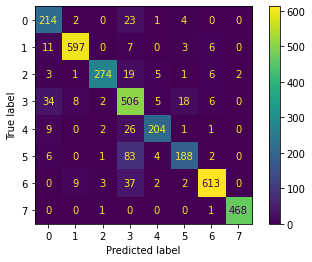

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# confusion matrix
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

labels = ['basofilos', 'eosinofilos', 'eritroblastos', 'granulocitos', 'linfocitos', 'monocitos', 'neutrofilos', 'plaquetas']
classifier = estimator(best_model, classes=labels)
plot_confusion_matrix(estimator=classifier, X=x_test, y_true=y_test)

#Analysing the mistakes

In [ ]:
# getting the predictions
probs = best_model.predict(x_test)
predictions = [np.argmax(probs[i]) for i in range(len(probs))]

107/107 [==============================] - 0s 2ms/step


In [ ]:
# getting mistakes
mistakes_index = []
incorrect_labels = []
for i in range(len(predictions)):
  if predictions[i] != y_test[i]:
    incorrect_labels.append(predictions[i])
    mistakes_index.append(i)

print(f'from {len(predictions)} entries, the model misclassified {len(mistakes_index)}')

from 3421 entries, the model misclassified 357


In [ ]:
# printing errors

for index in range(15):
  correct_index = mistakes_index[index]
  print(f'index: {mistakes_index[index]} - misclassified as {incorrect_labels[index]}; correct label is {y_test[correct_index]}')

index: 0 - misclassified as 5; correct label is [3]
index: 4 - misclassified as 3; correct label is [1]
index: 14 - misclassified as 3; correct label is [2]
index: 16 - misclassified as 3; correct label is [4]
index: 22 - misclassified as 0; correct label is [3]
index: 25 - misclassified as 3; correct label is [6]
index: 35 - misclassified as 3; correct label is [6]
index: 37 - misclassified as 3; correct label is [5]
index: 50 - misclassified as 3; correct label is [5]
index: 58 - misclassified as 3; correct label is [6]
index: 69 - misclassified as 4; correct label is [2]
index: 77 - misclassified as 3; correct label is [0]
index: 102 - misclassified as 3; correct label is [5]
index: 111 - misclassified as 1; correct label is [6]
index: 118 - misclassified as 7; correct label is [2]


incorrect label: 0; correct label: 3


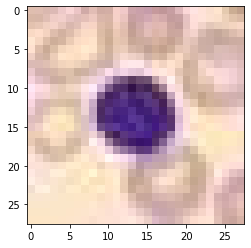

In [ ]:
plt.imshow(x_test[69], cmap="Greys_r")
print('incorrect label: 0; correct label: 3')